# End-to-end Multi-class Dog Breed Identifier

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

For more details, refer README file in GitHub repo.

Data: https://www.kaggle.com/c/dog-breed-identification/data

Cheers!

P.S: Data imported from Google Drive

### Get our workspace ready

* Import TensorFlow 2.x 
* Import TensorFlow Hub 
* Make sure we're using a GPU


In [2]:
#Import TensorFlow into Colab
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.2.0


In [3]:
#Import necessary tools
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF hub version:", hub.__version__)

#Check GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.2.0
TF hub version: 0.8.0
GPU available


By default, GPU isn't allocated. So, go to and select:

Runtime >> Change runtype >> GPU

## Getting our data ready (turning into Tensors)

We should convert the input images to numerical representations called Tensors

In [4]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Dog Breed/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     ef3dc6a3af2210c9cc59e2bbdc9e9ae1  scottish_deerhound
freq                                   1                 126


In [5]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

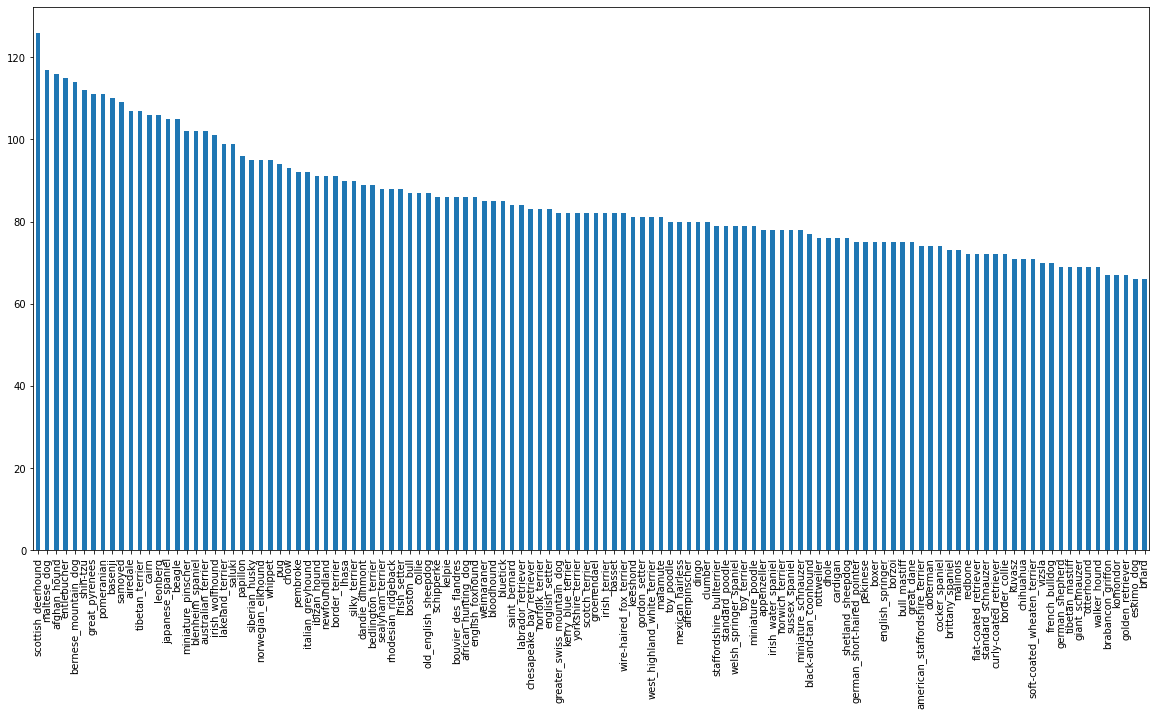

In [6]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [7]:
labels_csv["breed"].value_counts().median()

82.0

In [0]:
#Viewing an image
#from IPython.display import Image
#Image("drive/My Drive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels 

In [9]:
#Create pathnames from image IDs
filenames = ["drive/My Drive/Dog Breed/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first 10
filenames[:10]

['drive/My Drive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
#Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog Breed/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

#Unfortunately, there was some kinda issue while uploading train img folder in drive

Filenames do no match actual amount of files, check the target directory.


In [11]:
import numpy as np
labels = labels_csv["breed"].to_numpy() 
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
len(labels)

10222

In [13]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames, check data directories")

Number of labels matches number of filenames


In [14]:
#Finding unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
#Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
#Turning every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [0]:
#Setup X and y
X = filenames
y = boolean_labels

Let's experiment with ~1000 images and increase as we need

In [0]:
#Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [21]:
#Splitting our data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [22]:
#Let's see the training data
X_train[:5], y_train[:5]

(['drive/My Drive/Dog Breed/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Breed/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Breed/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Breed/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Breed/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing Images (turning images into Tensors)

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [24]:
#Convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [25]:
image.max(), image.min()

(255, 0)

In [26]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [27]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Function to preprocessing images

In [0]:
#Define image size
IMG_SIZE = 224

#Create a function
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and converts it into tensors
  """
  #Read an image file
  image = tf.io.read_file(image_path)
  #turn the jpeg to numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  #convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

We are going to split data into batches of 32

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: 
`(image, label)`.

In [0]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [30]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches

In [0]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [32]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [33]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

 ## Visualizing Data Batches

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [35]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

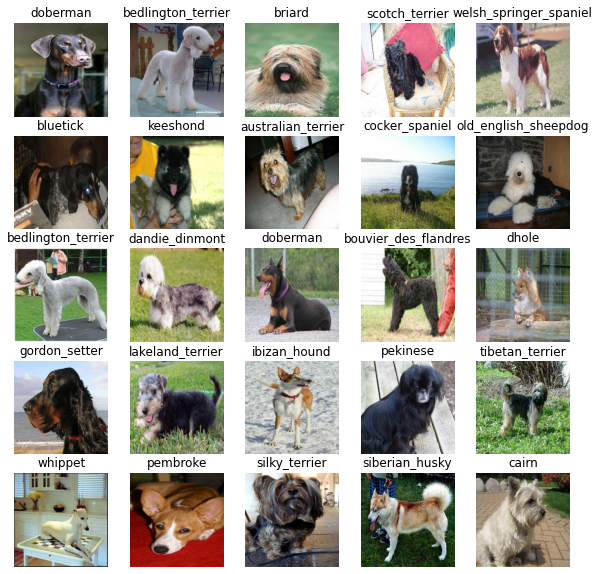

In [36]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

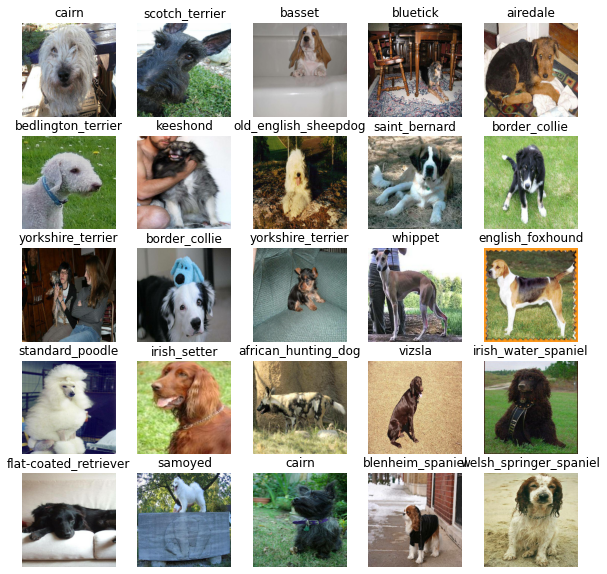

In [37]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [38]:
IMG_SIZE

224

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [40]:
INPUT_SHAPE

[None, 224, 224, 3]

Create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

In [0]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [42]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

**TensorBoard callback**

In [0]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Breed/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

**Early stopping callback**

In [0]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

In [0]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [48]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [50]:
# Fit the model to the data
#model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 705s 28s/step - loss: 4.5100 - accuracy: 0.1112 - val_loss: 3.2324 - val_accuracy: 0.2850
Epoch 2/100
25/25 [==============================] - 5s 184ms/step - loss: 1.5655 - accuracy: 0.6963 - val_loss: 2.0526 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 5s 182ms/step - loss: 0.5388 - accuracy: 0.9438 - val_loss: 1.6026 - val_accuracy: 0.6450
Epoch 4/100
25/25 [==============================] - 4s 178ms/step - loss: 0.2378 - accuracy: 0.9925 - val_loss: 1.4238 - val_accuracy: 0.6750
Epoch 5/100
25/25 [==============================] - 5s 182ms/step - loss: 0.1416 - accuracy: 0.9962 - val_loss: 1.3502 - val_accuracy: 0.6850
Epoch 6/100
25/25 [==============================] - 5s 182ms/step - loss: 0.0976 - accuracy: 0.9987 - val_loss: 1.3126 - val_accuracy: 0.6900
Epoch 7/100
25/25 [==============================

The model is found to be overfiting with a loss of 0.03 and an accuracy of 1

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [51]:
%tensorboard --logdir drive/My\ Drive/Dog\ Breed/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model 

In [52]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [53]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 113ms/step


array([[8.4184147e-03, 2.0808616e-04, 3.6441215e-04, ..., 5.2020495e-04,
        1.6937092e-04, 4.9016839e-03],
       [5.6553987e-04, 5.0182105e-04, 1.3165391e-02, ..., 7.9051453e-05,
        2.2202807e-03, 1.6949725e-05],
       [6.9586390e-06, 1.7052112e-06, 9.3247409e-06, ..., 2.8942583e-05,
        2.3380775e-05, 8.7116263e-05],
       ...,
       [1.5204880e-05, 4.3540138e-05, 9.5906908e-05, ..., 8.9273322e-05,
        2.9588549e-04, 8.4555009e-05],
       [1.8059965e-03, 6.9744437e-04, 1.7418344e-04, ..., 1.3555074e-04,
        4.3808650e-05, 4.1172616e-03],
       [1.4585409e-03, 1.6874596e-04, 1.2382065e-03, ..., 7.0234621e-03,
        6.3685002e-04, 3.1962343e-03]], dtype=float32)

In [54]:
predictions[0]

array([8.41841474e-03, 2.08086160e-04, 3.64412146e-04, 4.03269914e-05,
       1.04832102e-03, 1.16851945e-04, 1.84102003e-02, 4.38705145e-04,
       2.38447865e-05, 1.73995606e-04, 3.39009915e-04, 3.70324269e-05,
       4.30975997e-05, 1.99669848e-05, 1.07640587e-03, 3.85613472e-04,
       1.20101737e-04, 1.86155736e-01, 3.67804241e-05, 2.91443372e-04,
       2.96297570e-04, 9.29715898e-05, 6.70763839e-05, 1.51281699e-03,
       5.17293083e-05, 2.71780387e-04, 7.58360177e-02, 1.16715404e-04,
       1.30313070e-04, 5.92032564e-04, 1.02820391e-04, 9.87310661e-04,
       5.97165490e-04, 1.79213130e-05, 3.94636038e-04, 7.89444596e-02,
       2.02217227e-04, 1.23738981e-04, 1.65928577e-04, 4.49358049e-06,
       1.39621727e-03, 3.74982337e-05, 1.46064021e-05, 7.70071128e-05,
       1.37958168e-05, 1.83031749e-04, 1.30841523e-04, 1.24786515e-04,
       2.81886721e-04, 9.93291105e-05, 5.15497755e-04, 3.25770125e-05,
       7.95513275e-04, 2.07324920e-04, 2.12340281e-04, 1.30667060e-04,
      

In [55]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.6423354e-04 3.9196424e-05 8.7233013e-05 8.7289103e-05 4.0749111e-03
 6.4026783e-05 3.9042232e-05 8.2980690e-04 8.9210616e-03 5.8449473e-02
 9.2135233e-06 9.4417528e-06 2.4818443e-04 3.4198051e-03 6.5061642e-04
 9.8623475e-04 3.0029820e-05 1.9076734e-04 1.5982252e-04 2.5448890e-04
 3.2608128e-05 5.4721074e-04 2.8585489e-05 4.7042075e-05 9.9130981e-03
 1.7413715e-04 5.1241412e-05 2.1827989e-04 8.7496788e-05 2.7666720e-05
 1.8622588e-05 5.5083161e-05 9.1473128e-05 2.5227617e-05 4.6928755e-05
 4.7877693e-06 7.1004870e-05 1.6772961e-04 9.5956872e-05 1.5122972e-01
 8.5854219e-05 3.7362806e-05 1.4480372e-03 6.6891612e-06 8.2841325e-05
 1.4539389e-05 1.5972499e-04 2.0428652e-04 2.6127562e-05 7.5508136e-04
 1.2959076e-04 5.6245426e-05 3.5322984e-05 2.4066095e-03 1.0302640e-05
 1.6604085e-04 7.5525917e-05 3.1788397e-05 2.4213627e-04 6.0359835e-06
 4.5063593e-05 4.1414698e-04 3.0502645e-06 4.9703158e-05 4.7015437e-05
 3.0649480e-05 7.6496399e-05 4.3739387e-04 4.7599591e-04 8.1153936e-05
 1.185

In [56]:
unique_breeds[113]

'walker_hound'

We have to be able to do it at scale.

**Note:** Prediction probabilities are also known as confidence levels.

In [57]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'chihuahua'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [58]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [59]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

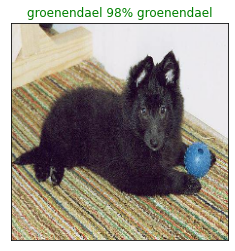

In [61]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer 
* Find the prediction using `get_pred_label()` 
* Find the top 10:
  * Prediction probabilities indexes 
  * Prediction probabilities values 
  * Prediction labels 
* Plot the top 10 prediction probability values and labels, coloring the true label green 

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

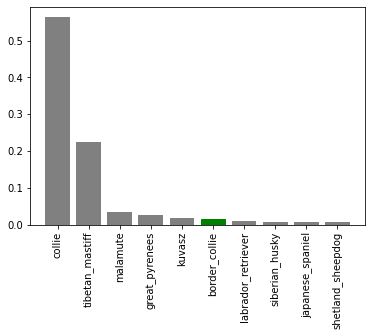

In [63]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

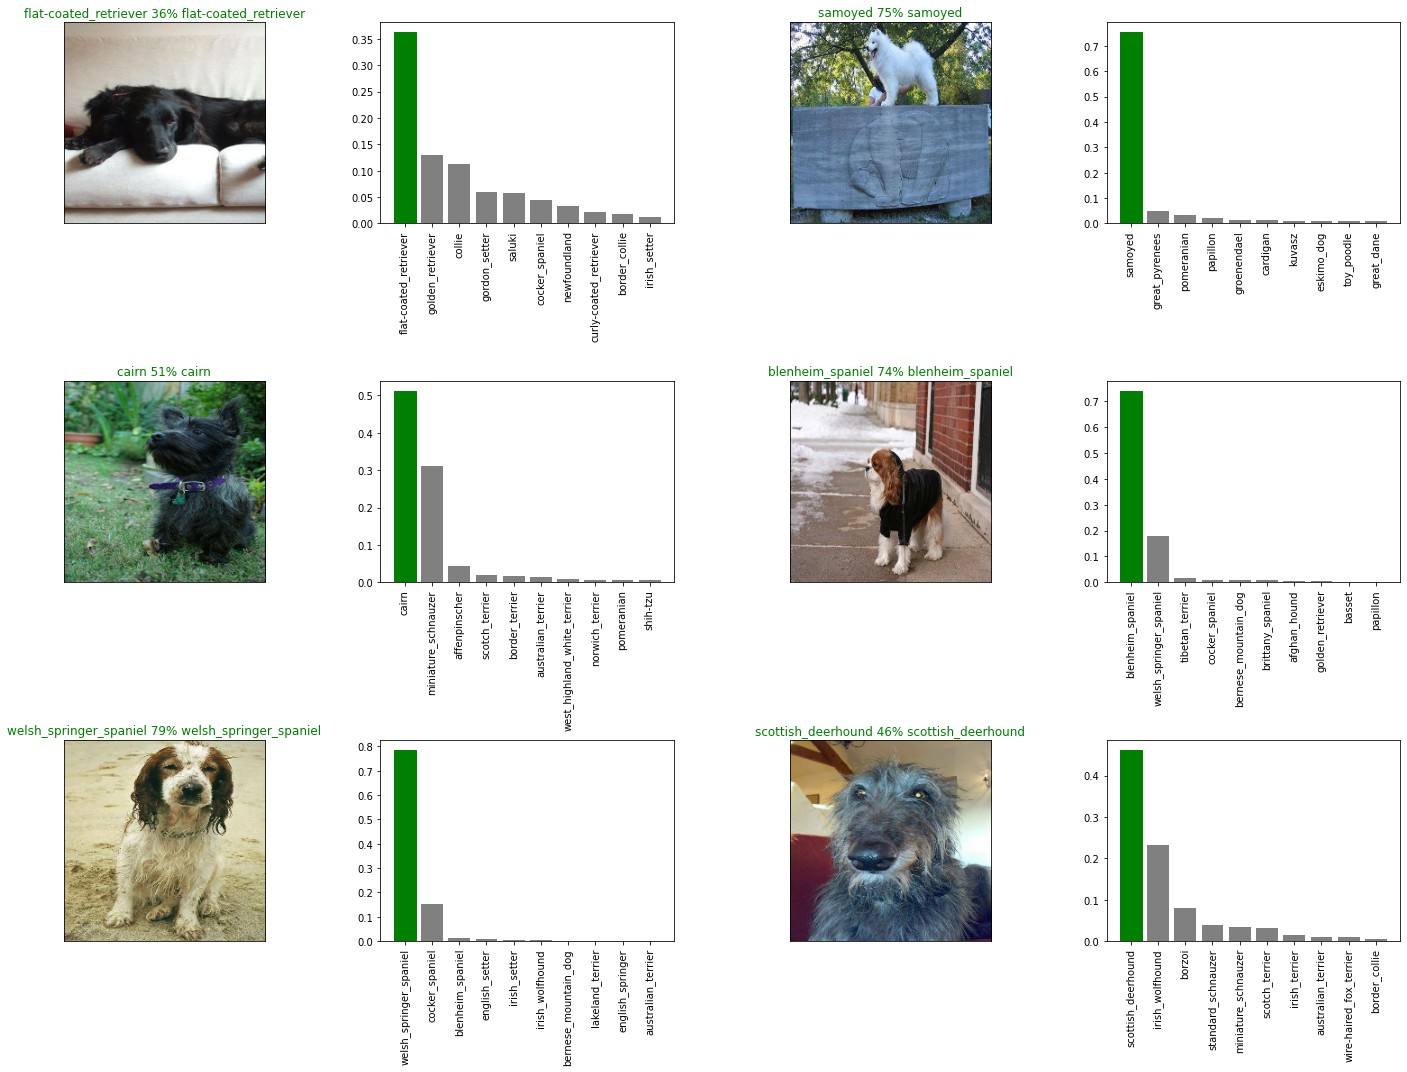

In [64]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [0]:
#create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """
  modeldir = os.path.join("/content/drive/My Drive/Dog Breed/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
#Create a function to load a trained model
def load_model(model_path):
  """
  Loads a trained model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


In [68]:
#Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Breed/models/20200516-14291589639380-1000-images-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Breed/models/20200516-14291589639380-1000-images-mobilenetv2-Adam.h5'

In [69]:
#load a trained model
loaded_1000_image_model = load_model('/content/drive/My Drive/Dog Breed/models/20200516-14291589639380-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/My Drive/Dog Breed/models/20200516-14291589639380-1000-images-mobilenetv2-Adam.h5


In [70]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 103ms/step - loss: 1.2209 - accuracy: 0.6950


[1.2209291458129883, 0.6949999928474426]

In [71]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 106ms/step - loss: 1.2209 - accuracy: 0.6950


[1.2209291458129883, 0.6949999928474426]

## Training model on the full data

In [72]:
len(X), len(y)

(10222, 10222)

In [74]:
#Create a data batch with the full data set
full_data = create_data_batches(X, y)
full_data

Creating training data batches...


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [75]:
#create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
#Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [77]:
#Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 8584s 27s/step - loss: 1.3117 - accuracy: 0.6774
Epoch 2/100
320/320 [==============================] - 45s 142ms/step - loss: 0.3979 - accuracy: 0.8816
Epoch 3/100
320/320 [==============================] - 45s 141ms/step - loss: 0.2350 - accuracy: 0.9370
Epoch 4/100
320/320 [==============================] - 45s 141ms/step - loss: 0.1513 - accuracy: 0.9652
Epoch 5/100
320/320 [==============================] - 45s 141ms/step - loss: 0.1048 - accuracy: 0.9799
Epoch 6/100
320/320 [==============================] - 46s 143ms/step - loss: 0.0774 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 45s 141ms/step - loss: 0.0573 - accuracy: 0.9927
Epoch 8/100
320/320 [==============================] - 45s 141ms/step - loss: 0.0466 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 45s 141ms/step - loss: 0.0354 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 45s 140m

In [78]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Breed/models/20200516-17211589649679-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Breed/models/20200516-17211589649679-full-image-set-mobilenetv2-Adam.h5'

In [79]:
# Load in the full model
loaded_full_model = load_model('/content/drive/My Drive/Dog Breed/models/20200516-17211589649679-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/My Drive/Dog Breed/models/20200516-17211589649679-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames. 
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels). 
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [94]:
#load test image file names
test_path = "/content/drive/My Drive/Dog Breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/Dog Breed/test/f51f6aeea8a23b6bd62728fde8f04ad8.jpg',
 '/content/drive/My Drive/Dog Breed/test/e95640aaa10c9ad1c6e27a175c04511b.jpg',
 '/content/drive/My Drive/Dog Breed/test/eaa28b3163bb05afd07117ec4c6bb059.jpg',
 '/content/drive/My Drive/Dog Breed/test/e823ee1ca007c88600806925a6f2bce1.jpg',
 '/content/drive/My Drive/Dog Breed/test/ecab3cabdfabe8663ab388e891afdbed.jpg',
 '/content/drive/My Drive/Dog Breed/test/f21a70f111a4a05ac167c1707651293a.jpg',
 '/content/drive/My Drive/Dog Breed/test/ee345e7f5ac2d3cf979a17183437faa7.jpg',
 '/content/drive/My Drive/Dog Breed/test/eb3849def6fa245bcaae9ab9c64f024f.jpg',
 '/content/drive/My Drive/Dog Breed/test/f27e014627c0495cd7a9ef27235bc7a6.jpg',
 '/content/drive/My Drive/Dog Breed/test/f3d0cbdba1dab4f22ab5510723dd969a.jpg']

In [95]:
len(test_filenames)

10394

In [96]:
#create test data batcg
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [97]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

325/325 [==============================] - 8646s 27s/step


In [0]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Breed/preds_array.csv", test_predictions, delimiter=",")

In [0]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Breed/preds_array.csv", delimiter=",")

In [101]:
test_predictions[:10]

array([[1.30351971e-11, 1.08423537e-08, 2.12239160e-09, ...,
        5.50799184e-10, 2.87053974e-12, 2.22464731e-08],
       [1.08633976e-05, 1.19152271e-10, 1.43475343e-09, ...,
        3.59099278e-11, 7.25397342e-08, 1.94375985e-03],
       [7.08798645e-11, 4.20215945e-12, 1.17633334e-10, ...,
        1.15778628e-11, 6.55038646e-09, 1.71231363e-07],
       ...,
       [2.84792155e-11, 9.61405773e-14, 6.66077304e-10, ...,
        1.17320255e-07, 1.45184986e-09, 5.80223147e-10],
       [1.22570079e-10, 5.27648240e-07, 2.68652478e-08, ...,
        2.64661519e-08, 2.14988596e-08, 5.87572612e-12],
       [9.90310334e-11, 5.40192202e-09, 9.99930859e-01, ...,
        1.04434156e-10, 1.18770854e-10, 4.25554453e-11]])

In [102]:
test_predictions.shape

(10394, 120)

## Preparing test dataset predictions


* Create a pandas DataFrame with an ID column as well as a column for each dog breed. 
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilites) to each of the dog breed columns.
* Export the DataFrame as a CSV

In [103]:
#Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
#Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [105]:
preds_df.head()

id  ... yorkshire_terrier
0  f51f6aeea8a23b6bd62728fde8f04ad8  ...               NaN
1  e95640aaa10c9ad1c6e27a175c04511b  ...               NaN
2  eaa28b3163bb05afd07117ec4c6bb059  ...               NaN
3  e823ee1ca007c88600806925a6f2bce1  ...               NaN
4  ecab3cabdfabe8663ab388e891afdbed  ...               NaN

[5 rows x 121 columns]

In [106]:
#Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  f51f6aeea8a23b6bd62728fde8f04ad8  ...       2.22465e-08
1  e95640aaa10c9ad1c6e27a175c04511b  ...        0.00194376
2  eaa28b3163bb05afd07117ec4c6bb059  ...       1.71231e-07
3  e823ee1ca007c88600806925a6f2bce1  ...       6.82638e-07
4  ecab3cabdfabe8663ab388e891afdbed  ...       4.34901e-06

[5 rows x 121 columns]

In [0]:
#Save our predictions dataframe to CSV
preds_df.to_csv("drive/My Drive/Dog Breed/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [0]:
# Get custom image filepaths
custom_path = "/content/drive/My Drive/Dog Breed/Custom_Images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [109]:
custom_image_paths

['/content/drive/My Drive/Dog Breed/Custom_Images/dog-image-3.jpeg',
 '/content/drive/My Drive/Dog Breed/Custom_Images/dog-image-2.jpeg',
 '/content/drive/My Drive/Dog Breed/Custom_Images/dog-image-1.jpeg']

In [110]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [112]:
custom_preds.shape

(3, 120)

In [113]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['pembroke', 'maltese_dog', 'shih-tzu']

In [0]:
#Get custom images
custom_images = []
#Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

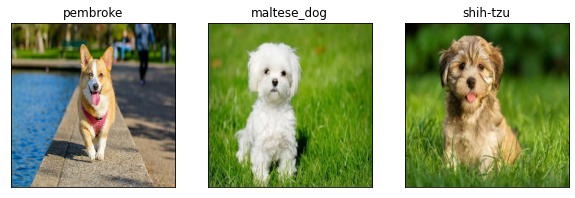

In [115]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)